# Imports and Globals

In [2]:
!pip install palmerpenguins

In [108]:
#imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import metrics,datasets,neighbors
from palmerpenguins import load_penguins

### Load sample data and poke around to understand it

For this tutorial, we'll use a classic sample dataset called the Palmer Penguins. There will be more details below.

In [20]:
penguinsdf = load_penguins()

In [97]:
penguinsdf.head()
penguinsdf.dropna(inplace = True)

In [98]:
penguinsdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Another dataset that we are gonna work on is the iris dataset again. But this time we will be loading it directly from sklearn.datasets. And they way its stored is slightly different

In [12]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

What's an sklearn bunch?? Looking at the documentation for the sklearn iris dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), we see that a bunch is just a python dictionary. Let's try interacting with it as we would a dictionary and seeing the what the keys are.

In [ ]:
iris.keys()

Great! We see that there are 6 keys. Let's take a look at the description.

In [13]:
#index the iris dictionary to see the description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

This gives a nice description and background of the classic iris dataset. Now, let's poke around and see what the other things in the iris dictionary are.

In [14]:
#print each of the remaining values in the iris dictionary by indexing the dictionary with the keys
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
print(iris['filename'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/datasets/data/iris.csv


Okay, it's clear these values of the iris dataset appear as we expected from the documentation. Let's store the data in a pandas dataframe to more easily manipulate it.

In [28]:
#create a pandas dataframe to store the data and a pandas series to store the targets or y labels
irisdf = pd.DataFrame(data=iris['data'], index=range(1,151,1), columns=iris['feature_names'])
ylabels = pd.Series(data=iris['target'], index=range(1,151,1), name="iris type")
irisdf['label'] = ylabels

In [29]:
#let's check that our dataframe looks as we expect
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [31]:
#now let's check the series
ylabels

1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: iris type, Length: 150, dtype: int64

## Linear Regression

Let's look at some visualizations!

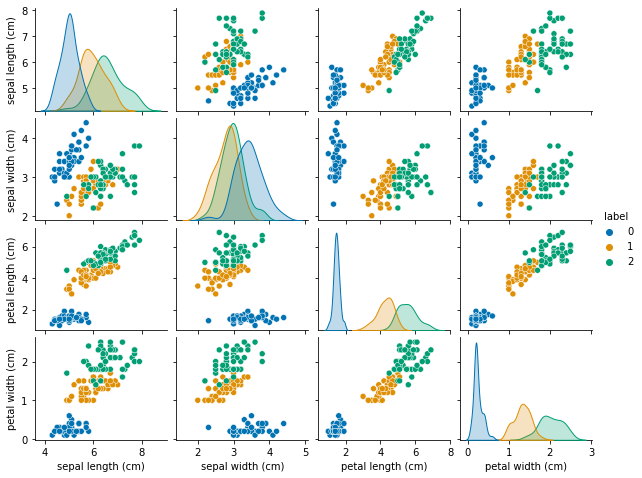

In [38]:
pairplot_figure = sns.pairplot(irisdf, hue='label',palette='colorblind')
pairplot_figure.fig.set_size_inches(9, 6.5)

Which correlation looks most linear? Let's plot the petal length against petal width. 

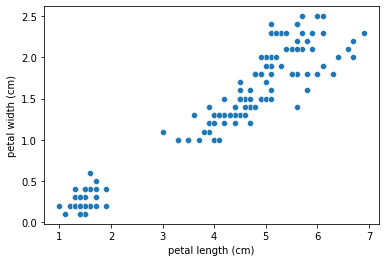

In [39]:
data_columns = ["petal length (cm)"]
target_column = "petal width (cm)"
_ = sns.scatterplot(data=irisdf, x=data_columns[0], y=target_column)

Now lets try building a linear regression model that use petal lenght to predict petal width. FIrst we neet to split the data in to train/test sets using a 50/50 split

In [40]:
def splitdata(data, testratio):
    #set seed so train and test will always split the same
    np.random.seed(42)
    shuffindices = np.random.permutation(len(data))
    testsize = int(len(data) * testratio)
    testindices = shuffindices[:testsize]
    trainindices = shuffindices[testsize:]
    return data.iloc[trainindices], data.iloc[testindices]

In [56]:
#split the test/train set
iristrain, iristest = splitdata(irisdf, 0.5)
y_train = iristrain['petal width (cm)']
y_test = iristest['petal width (cm)']

In [57]:
#see dimensions fit each other
y_train

85     1.5
149    2.3
54     1.3
6      0.4
94     1.0
      ... 
72     1.3
107    1.7
15     0.2
93     1.2
103    2.1
Name: petal width (cm), Length: 75, dtype: float64

In [58]:
#fit the linear model
reg = LinearRegression().fit(iristrain.loc[:,["petal length (cm)"]], y_train)

R^2 is one of the most commonly used metrice to evaluate a linear regression fit: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [59]:
#how good is the fit based on the R^2 coefficient of determination
reg.score(iristrain.loc[:,["petal length (cm)"]], y_train)

0.9115804342488171

Predict the held out test data using the linear regression model trained on the train fold of the data

In [60]:
predictions = reg.predict(iristest.loc[:,["petal length (cm)"]])

Now lets visualize how well the linear regression did in predicting the held out 

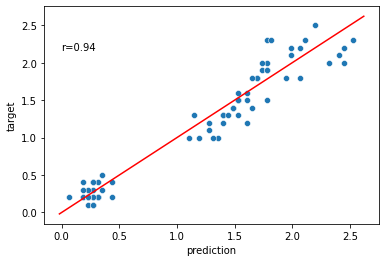

In [76]:
ax =sns.scatterplot(x = predictions, y = y_test)
ax.set(xlabel='prediction', ylabel='target')
r2 = reg.score(iristest.loc[:,["petal length (cm)"]], y_test)
ax.text(.05, .8, 'r={:.2f}'.format(r2),
            transform=ax.transAxes)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
ax.plot(lims, lims, '-r')
plt.show()

### Activity

Now try the same process we just done on the palmer penguin dataset. Can you identify features that are linearly correlated? Can one feature help predicting the target feature?

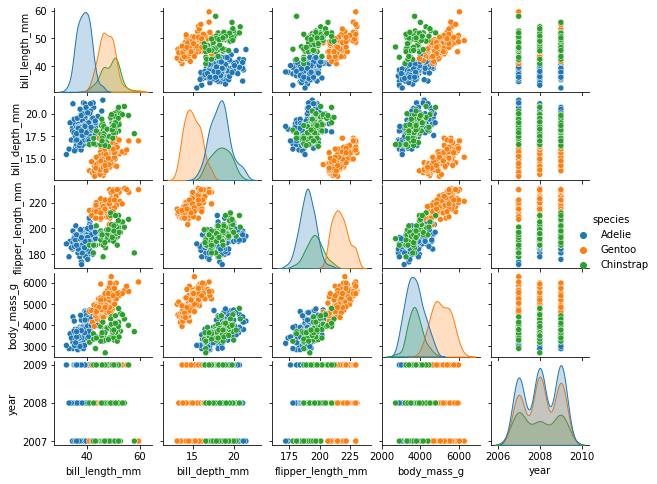

In [99]:
#plot visulization of the palmer penguins dataset, identify linearly related features
pairplot_figure = sns.pairplot(penguinsdf, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

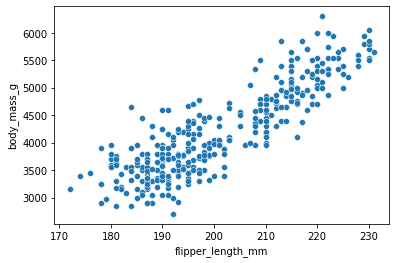

In [100]:
#Scatter plot of the features you identified.
data_columns = ["flipper_length_mm"]
target_column = "body_mass_g"
_ = sns.scatterplot(data=penguins, x=data_columns[0], y=target_column)

In [101]:
#split the test/train set, you can directly use the defined splitdata function
ptrain, ptest = splitdata(penguinsdf, 0.5)
y_train = ptrain['body_mass_g']
y_test = ptest['body_mass_g']

In [102]:
#fit the linear model
reg = LinearRegression().fit(ptrain.loc[:,["flipper_length_mm"]], y_train)

In [103]:
#how good is the fit based on the R^2 coefficient of determination
reg.score(ptrain.loc[:,["flipper_length_mm"]], y_train)

0.7290721617851774

In [104]:
#predict the held out test set
predictions = reg.predict(ptest.loc[:,["flipper_length_mm"]])

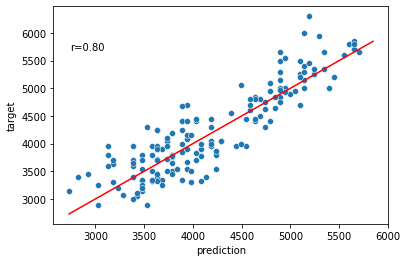

In [105]:
#compute r2 and plot prediction against ground truth of test set
ax =sns.scatterplot(x = predictions, y = y_test)
ax.set(xlabel='prediction', ylabel='target')
r2 = reg.score(ptest.loc[:,["flipper_length_mm"]], y_test)
ax.text(.05, .8, 'r={:.2f}'.format(r2),
            transform=ax.transAxes)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
ax.plot(lims, lims, '-r')
plt.show()

# PCA Analysis

PCA, or principla component analysis is a commonly used dimension reduction algorithm : https://en.wikipedia.org/wiki/Principal_component_analysis
Principal components can be considered as linear combinations of features. 
It projects each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

In [148]:
#take numerical columns out of df
numerics = ['float16', 'float32', 'float64']
numdf = irisdf.select_dtypes(include=numerics)
numdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [146]:
#or, for the iris dataset thats stored as sklearn bunch
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [149]:
#fit PCA model
pca =PCA(n_components=4)
pca.fit(numdf)
X = pca.transform(numdf)

In [150]:
#Construct PCA output into a dataframe
pca_df = pd.DataFrame(data=X,columns = ['PC1','PC2','PC3','PC4'])
pca_df['label'] = iris.target
pca_df.head()

,PC1,PC2,PC3,PC4,label
0,-2.684126,0.319397,-0.027915,-0.002262,0
1,-2.714142,-0.177001,-0.210464,-0.099027,0
2,-2.888991,-0.144949,0.017900,-0.019968,0
3,-2.745343,-0.318299,0.031559,0.075576,0
4,-2.728717,0.326755,0.090079,0.061259,0


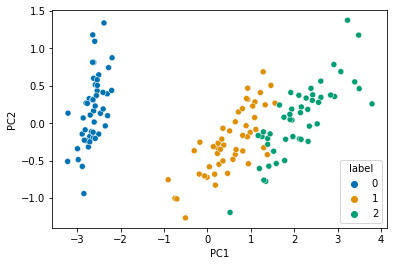

In [151]:
#visualize PCA with label information
sns.scatterplot(x ="PC1",y="PC2",data=pca_df,hue='label',palette='colorblind')
plt.show()

### Activity

Try to replicate the PCA analysis on the palmer penguin datasets

In [152]:
#take numerical columns out of df
numerics = ['float16', 'float32', 'float64','int32','int64']
numdf = penguinsdf.select_dtypes(include=numerics)
numdf

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009
340,43.5,18.1,202.0,3400.0,2009
341,49.6,18.2,193.0,3775.0,2009
342,50.8,19.0,210.0,4100.0,2009


In [153]:
#your code here
pca =PCA(n_components=4)
pca.fit(numdf)
X = pca.transform(numdf)

In [155]:
#Construct PCA output into a dataframe
pca_df = pd.DataFrame(data=X,columns = ['PC1','PC2','PC3','PC4'])
pca_df['species'] = penguinsdf['species']
pca_df.head()

,PC1,PC2,PC3,PC4,species
0,-457.325096,13.376298,1.247904,-0.376474,Adelie
1,-407.252228,9.205245,-0.032667,-1.090217,Adelie
2,-957.044699,-8.128321,-2.491467,0.720823,Adelie
3,-757.115824,-1.838910,-4.880569,2.073668,NaN
4,-557.177325,3.416994,-1.129267,2.629297,Adelie


Also Try plotting with different dimensions, see how it influences the way data is presented

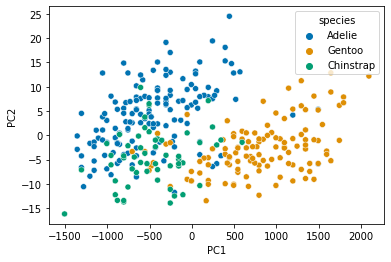

In [160]:
sns.scatterplot(x ="PC1",y="PC2",data=pca_df,hue='species',palette='colorblind')
plt.show()